In [36]:
import numpy as np


In [37]:
import pandas as pd

In [38]:
import matplotlib.pyplot as plt

In [39]:
import seaborn as sns

In [40]:
df=pd.read_csv('C:\\Users\\\s\Downloads\\archive\\tested.csv',usecols=['Survived','Age','Fare'])

In [41]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  418 non-null    int64  
 1   Age       332 non-null    float64
 2   Fare      417 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 9.9 KB


In [43]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [44]:
X=df.drop(['Survived'],axis=1)
y=df['Survived']

In [45]:
X.head()

,Age,Fare
0,34.5,7.8292
1,47.0,7.0000
2,62.0,9.6875
3,27.0,8.6625
4,22.0,12.2875


In [46]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [49]:
X_train.head()

,Age,Fare
109,18.5,13.0000
176,20.0,36.7500
366,NaN,14.4583
407,50.0,211.5000
280,23.0,8.6625


In [50]:
y_train.head()

109    0
176    1
366    0
407    0
280    1
Name: Survived, dtype: int64

In [51]:
len(X_train)

280

In [52]:
len(X_test)

138

# End of Distribution

In [53]:
import warnings
warnings.filterwarnings('ignore')

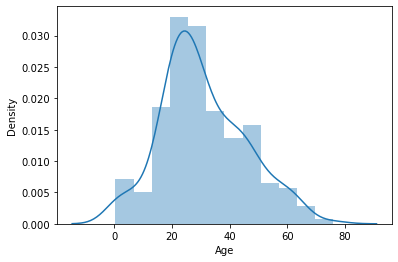

In [54]:
sns.distplot(X_train['Age'])
plt.show()

In [55]:
X_train['Age'].isnull().sum()

59

In [56]:
### Age following normal distribution so we can use standard devition technoque

In [60]:
c=X_train['Age'].mean()+3*X_train['Age'].std()
c

74.97527993501252

In [61]:
X_train['Age_repplaced']=X_train['Age'].fillna(c)

In [62]:
X_train.head()

,Age,Fare,Age_repplaced
109,18.5,13.0000,18.50000
176,20.0,36.7500,20.00000
366,NaN,14.4583,74.97528
407,50.0,211.5000,50.00000
280,23.0,8.6625,23.00000


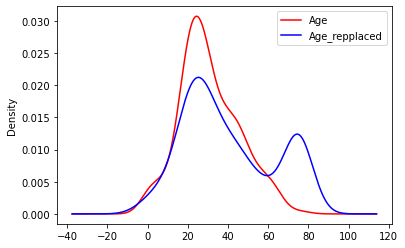

In [74]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
X_train['Age'].plot(kind='kde',color='r',ax=ax,label='Age')
X_train['Age_repplaced'].plot(kind='kde',color='b',ax=ax,label='Age_repplaced')
plt.legend(loc=0)
plt.show()

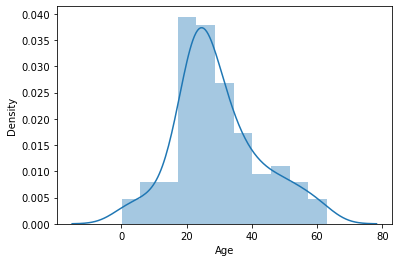

In [73]:
sns.distplot(X_test['Age'])
plt.show()

In [75]:
X_test['Age'].isnull().sum()

27

In [76]:
X_test['Age_replaced']=X_test['Age'].fillna(c)

In [77]:
X_test.head()

,Age,Fare,Age_replaced
321,25.0,7.2292,25.0
324,39.0,211.3375,39.0
388,21.0,7.7500,21.0
56,35.0,7.8958,35.0
153,36.0,12.1833,36.0


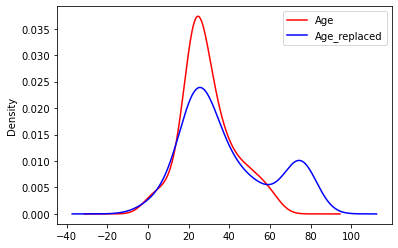

In [79]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
X_test['Age'].plot(kind='kde',color='r',ax=ax,label='Age')
X_test['Age_replaced'].plot(kind='kde',color='b',ax=ax,label='Age_replaced')
plt.legend(loc=0)
plt.show()

### For Fare column

<AxesSubplot:xlabel='Fare', ylabel='Density'>

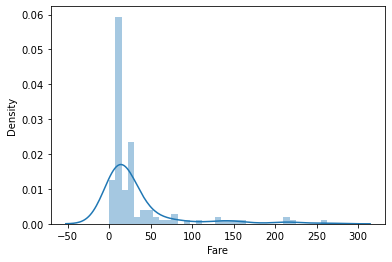

In [83]:
sns.distplot(X_test['Fare'])

In [84]:
X_test['Fare'].isnull().sum()

1

In [82]:
df.isnull().sum()

Survived     0
Age         86
Fare         1
dtype: int64

In [92]:
IQR=X_test['Fare'].quantile(0.75)-X_test['Fare'].quantile(0.25)

In [93]:
IQR

19.8542

In [98]:
b=X_test['Fare'].quantile(0.75)+1.5*IQR
b

57.5313

In [99]:

X_test['Fare_replaced']=X_test['Fare'].fillna(b)

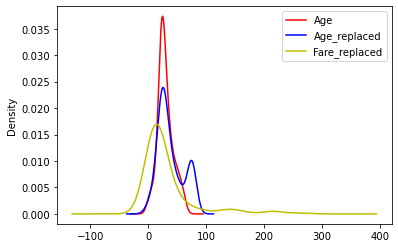

In [100]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
X_test['Age'].plot(kind='kde',color='r',ax=ax,label='Age')
X_test['Age_replaced'].plot(kind='kde',color='b',ax=ax,label='Age_replaced')
X_test['Fare_replaced'].plot(kind='kde',color='y',ax=ax,label='Fare_replaced')
plt.legend(loc=0)
plt.show()